<a href="https://colab.research.google.com/github/Brandon12231/Business-Analytics-Toolbox/blob/master/3%20Copy_of_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this homework fit and select a classifier to predict credit card default using `default_of_credit_card_clients` dataset from BlackBoard course site. The data description is available at : https://www.kaggle.com/datasets/jishnukoliyadan/taiwan-default-credit-card-clients

1. Explore (5+5+10=20 points)
  1. load the dataset. Use only the columns "LIMIT_BAL", "SEX", "EDUCATION", "MARRIAGE", and "AGE" among predictors. The target is "default payment next month". 
  1. identify the categorical features (with brief explanation), and 
  1. produce the pairwise scatter plot only for the numeric variables. 
1. Prepare a pipeline to (30 points)
  1. standardize the numeric attributes
  1. expand the categorical attributes to columns of 0/1 variables
  1. fit a `RandomForestClassifier` classifier
1. Search over the `max_depth` and `min_samples_leaf` parameters to find the best model per **balanced accuracy** metric. Use at least three different search strategies and discuss any differences you see in the results. (20 points)
1. Let's assume that the cost of missing a default (i.e., predicting non-default for a customer who ended up defaulting) is 10 times the cost of flagging a non-defaulter as defaulter. Let's further assume that the cost of correct predictions are 0. Use any one of the search strategies considered in the previous question to find the `RandomForestClassifier` that minimizes the cost. (20 points)
1. Collaboration statement: Who did you discuss while answering this homework (whether to get or to provide help)? What questions/topics did you discuss? (10 points)

Note: No penalty for either side. While getting help in figuring out how to solve is OK, all answers should be produced by you. 


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
data_folder = '/content/drive/MyDrive/data/810/default_of_credit_card_clients.csv/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
from google.colab import drive
drive.mount('/content/drive')
data_folder = '/content/drive/MyDrive/data/810/default_of_credit_card_clients.csv/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
data = pd.read_csv('/content/drive/MyDrive/data/810/default_of_credit_card_clients.csv')
data.info()
data.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [14]:
data ["default payment next month"].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

 for SEX and MARRIAGE,EDUCATION,"default payment next month"obviously are categorical features, within realy few amout of variables and with no mathematical meaning

> Indented block



In [15]:
data=data[["LIMIT_BAL","SEX","EDUCATION","MARRIAGE","AGE","default payment next month"]]
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,default payment next month
0,20000,2,2,1,24,1
1,120000,2,2,2,26,1
2,90000,2,2,2,34,0
3,50000,2,2,1,37,0
4,50000,1,2,1,57,0
...,...,...,...,...,...,...
29995,220000,1,3,1,39,0
29996,150000,1,3,2,43,0
29997,30000,1,2,2,37,1
29998,80000,1,3,1,41,1


In [16]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size = .25, random_state=0)

train_data.shape, test_data.shape

((22500, 6), (7500, 6))

In [17]:
train_data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,default payment next month
count,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000
mean,167442.385778,1.600000,1.851244,1.552933,35.458222,0.222400
std,129451.673597,0.489909,0.788127,0.521546,9.178627,0.415868
min,10000.000000,1.000000,0.000000,0.000000,21.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,75.000000,1.000000


Just did value_counts() to ckeck how much value does each column have, for SEX and MARRIAGE,EDUCATION,  obviously are categorical features, within realy few amout of variables and with no mathematical meaning

In [18]:
train_data["SEX"].value_counts()

2    13500
1     9000
Name: SEX, dtype: int64

In [19]:
train_data["EDUCATION"].value_counts()

2    10522
1     7951
3     3684
5      202
4       92
6       38
0       11
Name: EDUCATION, dtype: int64

In [20]:
train_data["MARRIAGE"].value_counts()

2    12006
1    10215
3      238
0       41
Name: MARRIAGE, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


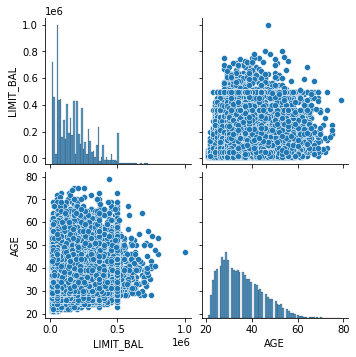

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
data1=data[["LIMIT_BAL","AGE"]]
sns.pairplot(data1, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='hist', markers=None, size=2.5, aspect=1, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None)


In [22]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn import set_config

set_config(display='diagram') # shows the pipeline structure graphically

num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

In [23]:
from sklearn.preprocessing import OneHotEncoder
cat_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse=False, drop="first"))
    ])

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

num_attribs = ["LIMIT_BAL","AGE"]
cat_attribs = ["SEX","EDUCATION","MARRIAGE"]

# The following step patches SimpleImputer to produce feature names
SimpleImputer.get_feature_names_out = StandardScaler.get_feature_names_out

preprocess_pipeline = ColumnTransformer([ # handle each type of column with appropriate pipeline
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

full_pipeline = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('ensemble', RandomForestClassifier()),
])

full_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['LIMIT_BAL', 'AGE']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['SEX', 'EDUCATION',
                                                   'MARRIAGE'])])),
                ('ensemble', RandomForestClassifier())])

In [25]:
df_X = train_data.drop("default payment next month", axis=1)
df_y = train_data["default payment next month"]
print(df_X.head())  # to check that 'y' isn't included

X_train = preprocess_pipeline.fit_transform(df_X)
y_train = df_y.values
preprocess_pipeline.get_feature_names_out() # check the column names produced by the pipeline

       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE
12880     130000    2          1         2   27
14868     130000    2          3         1   53
14280     140000    1          3         1   38
5318      270000    2          2         1   33
15421     220000    2          2         1   53


array(['num__LIMIT_BAL', 'num__AGE', 'cat__SEX_2', 'cat__EDUCATION_1',
       'cat__EDUCATION_2', 'cat__EDUCATION_3', 'cat__EDUCATION_4',
       'cat__EDUCATION_5', 'cat__EDUCATION_6', 'cat__MARRIAGE_1',
       'cat__MARRIAGE_2', 'cat__MARRIAGE_3'], dtype=object)

In [26]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score

X_test = preprocess_pipeline.transform(test_data)
y_test = test_data["default payment next month"]
y_pred = forest_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7324

In [28]:
balanced_accuracy_score(y_test, y_pred).round(4)

0.5275

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[5224  644]
 [1363  269]]


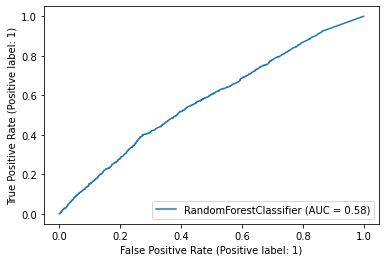

In [32]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(forest_clf, X_test, y_test);

In [33]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10, scoring='balanced_accuracy')
forest_scores.mean().round(3)

0.523

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

lr_pipe = make_pipeline(preprocess_pipeline, LogisticRegression())
# we have to use data frames here because the preprocessing step expects them.
lr_scores = cross_val_score(lr_pipe, df_X, df_y, cv=10, scoring='balanced_accuracy')
lr_scores.mean().round(3)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.5

In [35]:
import numpy as np


In [36]:
#GRID
from sklearn.model_selection import GridSearchCV

param_grid = [ 
    {'ensemble__max_depth': [2, 5, 10], 
    'ensemble__min_samples_leaf': [2, 5, 10], 
     }, 
    ]
# Check what's in this parameter grid
print('The parameter grid : ')
print(param_grid)




The parameter grid : 
[{'ensemble__max_depth': [2, 5, 10], 'ensemble__min_samples_leaf': [2, 5, 10]}]


In [37]:
full_pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessing', 'ensemble', 'preprocessing__n_jobs', 'preprocessing__remainder', 'preprocessing__sparse_threshold', 'preprocessing__transformer_weights', 'preprocessing__transformers', 'preprocessing__verbose', 'preprocessing__verbose_feature_names_out', 'preprocessing__num', 'preprocessing__cat', 'preprocessing__num__memory', 'preprocessing__num__steps', 'preprocessing__num__verbose', 'preprocessing__num__imputer', 'preprocessing__num__scaler', 'preprocessing__num__imputer__add_indicator', 'preprocessing__num__imputer__copy', 'preprocessing__num__imputer__fill_value', 'preprocessing__num__imputer__missing_values', 'preprocessing__num__imputer__strategy', 'preprocessing__num__imputer__verbose', 'preprocessing__num__scaler__copy', 'preprocessing__num__scaler__with_mean', 'preprocessing__num__scaler__with_std', 'preprocessing__cat__memory', 'preprocessing__cat__steps', 'preprocessing__cat__verbose', 'preprocessing__cat__imputer', 'preprocessing__

In [38]:

grid_search = GridSearchCV(full_pipeline, param_grid, cv=3, 
                                 scoring='balanced_accuracy')
grid_search.fit(df_X,df_y)
print('\n\nThe best parameters are ', grid_search.best_params_)

grid_cv_res = pd.DataFrame(grid_search.cv_results_) # convert to DF for convenience
grid_cv_res.sort_values(by='mean_test_score', ascending=False, inplace=True)  # sort the data frame
# select only the columns that start with 'param_' and the column 'mean_test_score'
grid_cv_res.filter(regex = '(^param_|mean_test_score)', axis=1).head()





The best parameters are  {'ensemble__max_depth': 10, 'ensemble__min_samples_leaf': 2}


,param_ensemble__max_depth,param_ensemble__min_samples_leaf,mean_test_score
6,10,2,0.501853
7,10,5,0.500641
8,10,10,0.500100
0,2,2,0.500000
1,2,5,0.500000


In [39]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

full_pipeline = Pipeline([
    ("preprocessing", preprocess_pipeline),
    ("random_forest", RandomForestClassifier(n_estimators=100, random_state=42)),
])
param_distribs = [ 
    {'random_forest__max_depth': randint(2, 100), 
    'random_forest__min_samples_leaf': randint(2, 100), 
    'random_forest__max_features': ["sqrt", "log2", None]}, 
    ]
random_search = RandomizedSearchCV(full_pipeline, param_distribs, n_iter=20, cv=3, 
                                 scoring='balanced_accuracy', random_state=42)
random_search.fit(df_X, df_y)
random_search.best_estimator_
cv_res = pd.DataFrame(random_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_forest__max_depth,param_random_forest__max_features,param_random_forest__min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
17,0.991461,0.031878,0.158378,0.001143,91,sqrt,3,"{'random_forest__max_depth': 91, 'random_fores...",0.507012,0.504054,0.506624,0.505896,0.001313,1
15,0.864027,0.026592,0.139674,0.001110,40,log2,5,"{'random_forest__max_depth': 40, 'random_fores...",0.503594,0.503250,0.501923,0.502922,0.000721,2
9,1.501391,0.025140,0.124078,0.002896,60,None,43,"{'random_forest__max_depth': 60, 'random_fores...",0.500300,0.501284,0.500899,0.500828,0.000405,3
19,0.801664,0.008825,0.128835,0.003742,72,sqrt,9,"{'random_forest__max_depth': 72, 'random_fores...",0.500471,0.501197,0.500470,0.500713,0.000343,4
18,1.895072,0.152110,0.136278,0.014851,85,None,61,"{'random_forest__max_depth': 85, 'random_fores...",0.500000,0.500428,0.500300,0.500243,0.000179,5


In [40]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

param_grid = [ 
    {'random_forest__max_depth': [2, 5, 10], 
    'random_forest__min_samples_leaf': [2, 5, 10], 
     }, 
    ]
# Check what's in this parameter grid
print('The parameter grid : ')
print(param_grid)

# Change to Halving strategy starting here
halving_grid_search = HalvingGridSearchCV(full_pipeline, param_grid, cv=3, 
                                    min_resources='exhaust', # use all data in the last round, back calculate to determine how much to start with
                                    scoring='balanced_accuracy')
halving_grid_search.fit(df_X, df_y)
print('The best parameters are ', halving_grid_search.best_params_)

halving_grid_cv_res = pd.DataFrame(halving_grid_search.cv_results_)  # convert to DF for convenience
# In the end, we care about performances in the last iteration (using most data)
# So, let's sort by iteration (descending), then by test score (descending)
halving_grid_cv_res.sort_values(by=['iter', 'mean_test_score'], ascending=False, inplace=True)
# and check the top few rows
halving_grid_cv_res.filter(regex = '(iter|^param_|mean_test_score|n_resources)', axis=1).head(30)

The parameter grid : 
[{'random_forest__max_depth': [2, 5, 10], 'random_forest__min_samples_leaf': [2, 5, 10]}]
The best parameters are  {'random_forest__max_depth': 10, 'random_forest__min_samples_leaf': 2}


,iter,n_resources,param_random_forest__max_depth,param_random_forest__min_samples_leaf,mean_test_score
12,2,22500,10,2,0.501710
11,1,7500,10,2,0.503486
10,1,7500,10,5,0.500547
9,1,7500,5,2,0.500000
6,0,2500,10,2,0.510365
7,0,2500,10,5,0.502087
3,0,2500,5,2,0.500031
0,0,2500,2,2,0.500000
1,0,2500,2,5,0.500000
2,0,2500,2,10,0.500000


**the result of grid search max depth is 10,min_samples_leaf is 2 give the randonforest prediction,AND i got same result from HalvingGridSearch with the same depth and min_samples_leaf,but not same mean_test_score( in same range), but in random search, i put randint(2, 100),so it got 91 in max_depth,3 in min_samples_leaf，much different result, and if i put np.arange(2,100), it toook me a lot of time, so i gave up.**

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, confusion_matrix
def default_cost(y_true, y_pred): 
  cm = confusion_matrix(y_true, y_pred)
  return cm[1,0] * 10 + cm[0,1] * 1

cost_scorer = make_scorer(default_cost, greater_is_better=False)

forest_costs = cross_val_score(forest_clf, X_train, y_train, cv=3, scoring=cost_scorer)
forest_costs.mean()

grid_search = GridSearchCV(full_pipeline, param_grid, cv=3, scoring=cost_scorer)
grid_search.fit(df_X, df_y)

cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_forest__max_depth,param_random_forest__min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
6,0.776672,0.026598,0.117622,0.002109,10,2,"{'random_forest__max_depth': 10, 'random_fores...",-16570.0,-16583.0,-16593.0,-16582.000000,9.416298,1
7,0.744111,0.009178,0.119094,0.004338,10,5,"{'random_forest__max_depth': 10, 'random_fores...",-16627.0,-16652.0,-16631.0,-16636.666667,10.964589,2
8,0.725354,0.016029,0.113126,0.001627,10,10,"{'random_forest__max_depth': 10, 'random_fores...",-16664.0,-16684.0,-16642.0,-16663.333333,17.152907,3
0,0.414541,0.001774,0.071503,0.002753,2,2,"{'random_forest__max_depth': 2, 'random_forest...",-16680.0,-16680.0,-16680.0,-16680.000000,0.000000,4
1,0.417508,0.007246,0.070386,0.000622,2,5,"{'random_forest__max_depth': 2, 'random_forest...",-16680.0,-16680.0,-16680.0,-16680.000000,0.000000,4


In [42]:
# We'll work with the best model obtained from grid search.
model = grid_search.best_estimator_

# What is the cost if we just applied that to the test data we set aside at near the beginning?
print('The cost under standard prediction strategy is %d.' % default_cost(y_test, model.predict(test_data)))

The cost under standard prediction strategy is 16176.


In [43]:
# Can we further improve cost simply by tuning its threshold? 

# Define a function that'll take the probabilities of test records being positive, a threshold, 
# and return a vector of predictions: positive when the probability is greater than the threshold, 
# negative otherwise.

def predict_labels(pos_probs, threshold):
	return np.where(pos_probs >= threshold, 'Yes', 'No')
				# Takes a vector of True/False's and returns a vector with second argument for True, 
				# third for False

	
# We need the classifier's estimated probability of each record being positive to do that.
class_probabilities = model.predict_proba(test_data)	
	# Returns N_test x N_classes matrix containing probabilities of records belonging to each class. 
	# Each row adds up to one.

# But we need the probabilities for the positive outcome only
probs = class_probabilities[:, 1]

# Define thresholds on positive outcomes at which to evaluate
thresholds = np.arange(0, 1, 0.001)

# evaluate each threshold
scores = [default_cost(y_test, predict_labels(probs, t)) for t in thresholds]

# get best threshold
ix = np.argmin(scores)
# And print the cost there
print('After optimization, threshold should be set at %.3f, \
	which will lead to cost of misclassification of %d.' % (thresholds[ix], scores[ix]))


ValueError: ignored